<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Unidad_2_Sesi%C3%B3n_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de clasificador SVM (Support Vector Machine)

## 0. Puntos importantes
* **Base Sólida**: Las SVM poseen una fundamentación teórica y matemática contundente, haciendo de ellas una herramienta confiable para la clasificación.

* **Hiperplanos Óptimos**: Estas máquinas trabajan con el concepto de hiperplanos de separación que buscan maximizar el margen entre las clases del conjunto de datos.

* **Vectores de Soporte**: Las SVM no utilizan todo el conjunto de datos, sino que se centran en puntos específicos, denominados vectores de soporte, que definen y maximizan el margen entre clases.

* **Prevención del Overfitting**: Gracias a su estructura y funcionamiento, las SVM logran una excelente generalización, minimizando el riesgo de adaptarse demasiado a los datos de entrenamiento.

* **Multiplicadores de Lagrange**: Estos multiplicadores son esenciales para resolver el problema de optimización con restricciones inherente en las SVM.

* **Funciones Kernel**: Cuando nos encontramos con datos que no son linealmente separables, las SVM utilizan funciones kernel para mapear los datos a un espacio de mayor dimensión donde pueden ser separables.

* **Flexibilidad**: Las SVM pueden trabajar tanto en problemas de clasificación como de regresión, mostrando versatilidad en distintas aplicaciones.

* **Tolerancia al Ruido**: Aunque son sensibles al ruido, las SVM tienen la capacidad de manejar cierto grado de datos atípicos o ruidosos, gracias a la elección adecuada del parámetro de regularización C.

* **Variabilidad de Kernels**: Aparte del kernel lineal, las SVM pueden implementar una variedad de funciones kernel, como polinomial, radial y sigmoidal, para adaptarse a diferentes tipos de estructuras de datos.

* **Eficiencia en Espacios de Alta Dimensión**: Las SVM pueden funcionar eficazmente en espacios con muchas dimensiones, aunque el costo computacional puede incrementar.

## 1. SVM linealmente separable

### 1.1. Importación de Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

### 1.2. Generación de datos
Estamos generando un conjunto de datos con dos clases bien separadas, ideal para demostrar el funcionamiento de una SVM lineal.

In [ ]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.2, random_state=45, center_box=(-5, 5))

### ¿En qué parámetros nos debemos fijar en SVM?
En este ejercicio la idea es que veamos como se modifica el hiperplano cuando modificamos los parametros W o el sesgo (b) pero en Scikit-learn no podemos hacer eso tal cual. Nosotros **nos basamos en el parámetro C**. Este **hiperparametro** nos **proporciona un equilibrio** entre la necesidad de una **clasificacion correcta** de los datos de entrenamiento contra la robustez del modelo. Es decir, que generalice bien con datos no vistos.

En otras palabras, controla la penalización por errores en la clasificación durante el entrenamiento.


### 1.3. Creación y Entrenamiento del modelo SVM
Recordemos que C es un término que controla el equilibrio entre maximizar el margen y minimizar la clasificación errónea de los puntos de entrenamiento, donde:

**Alto valor de C: (Margen duro)**

* El modelo tratará de clasificar todos los puntos de entrenamiento correctamente.
* La consecuencia podría ser un margen más pequeño si eso es necesario para clasificar correctamente todos los puntos.
* Puede ser más propenso al sobreajuste (overfitting) en algunos casos porque se ajusta demasiado a los de entrenamiento.

**Bajo valor de C: (Margen suave)**

* El modelo buscará un margen más grande, incluso si eso significa clasificar erróneamente algunos puntos de entrenamiento.
* Puede resultar en un modelo más generalizado, pero también puede subajustar (underfit) si el valor es demasiado bajo.

### 1.4. Generación del clasificador

En primer lugar se genera un clasificador linealmente separable con un parámetro C=10 con el que se irá "jugando" en apartados posteriores

In [ ]:
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

SVC(C=10, kernel='linear')

Sckit-Learn no permite modificar los parámetros del hiperplano tal cual hemos visto en la teoría. Se realiza una pequeña adaptación para poder "retocarlos" y estudiar cómo varía el clasificador con respecto a ellos.

In [ ]:
# Obtenemos los coeficientes del hiperplano
w = clf.coef_[0]
b = clf.intercept_[0]

In [ ]:
# @title 1.4.1. Función de hiperplano y margen
# Función para dibujar el hiperplano y los márgenes
def plot_svc_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creamos la cuadrícula para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # Dibujamos el hiperplano y los márgenes
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Restablecemos los límites originales
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### 1.4.2. SVM sin nuevo punto a clasificar

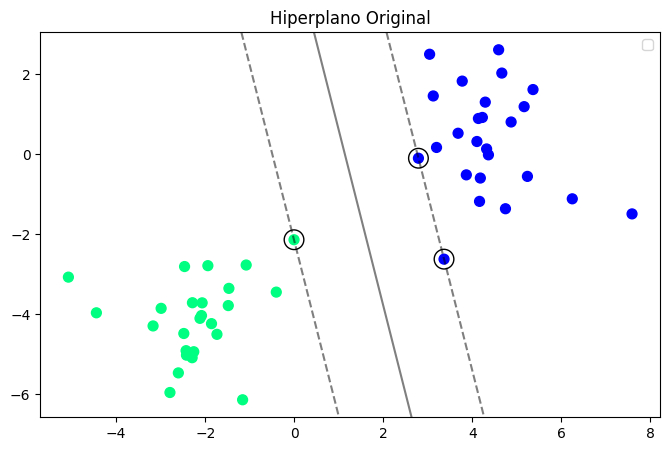

In [ ]:
# Creamos la figura
plt.figure(figsize=(8,5))

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibujamos los puntos de datos y el nuevo punto
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

# Dibujamos el hiperplano y los márgenes
plot_svc_decision_function(clf)

# Mostramos el hiperplano original
plt.title('Hiperplano Original')

# Dibujamos los vectores de soporte
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

# Mostramos el gráfico
plt.legend()
plt.show()

#### 1.4.3. SVM con nuevo punto a clasificar

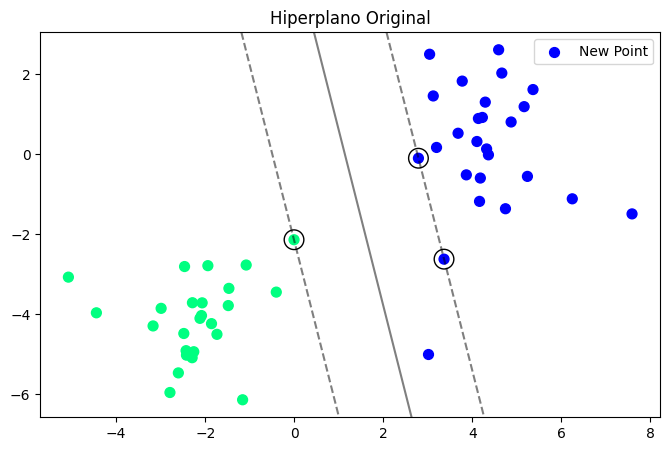

In [ ]:
# Definamos de nuevo el nuevo punto y clasifiquémoslo según el modelo SVM actual.
new_point = np.array([[3, -5]])
# new_point = np.array([[3, -5]])

# Ahora clasificamos el nuevo punto usando el modelo SVM actual.
new_point_pred = clf.predict(new_point)
new_point_color = 'lime' if new_point_pred[0] == 1 else 'blue'

# Creamos la figura
plt.figure(figsize=(8,5))

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibujamos los puntos de datos y el nuevo punto
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.scatter(new_point[:, 0], new_point[:, 1], c=new_point_color, s=50, label='New Point')

# Dibujamos el hiperplano y los márgenes
plot_svc_decision_function(clf)

# Mostramos el hiperplano original
plt.title('Hiperplano Original')

# Dibujamos los vectores de soporte
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

# Mostramos el gráfico
plt.legend()
plt.show()

- Jugar con diferentes puntos nuevos
- Hablar de la generalizacion con datos no vistos (Puedes explicar que el modelo utiliza la misma función de decisión derivada de los vectores de soporte para clasificar nuevos puntos.)


¿Según lo que hemos visto, que pasa si ponemos C = 10000?

Si tus datos son linealmente separables, lo que significa que existe un hiperplano que puede separar las dos clases sin errores, entonces un cambio en C no afectará la posición del hiperplano siempre que sea lo suficientemente grande como para penalizar cualquier error de clasificación.

In [ ]:
# @title 1.4.4. Función cambios en w y b
# Ahora, para visualizar cómo los cambios en w y b afectan al hiperplano, vamos a modificar estos parámetros
# y volver a dibujar el gráfico.
def plot_hyperplane(w, b, delta_b):
    new_point = np.array([[3, -5]])

    # Creamos la figura
    plt.figure(figsize=(8,5))

    # Establece el mapa de colores que usaremos para representar las dos clases.
    cmap = clr.ListedColormap(['blue', 'lime'])

    # Dibujamos los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plt.scatter(new_point[:, 0], new_point[:, 1], c=new_point_color, s=50, label='New Point')

    # Establecemos los límites para x
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)

    # Calculamos y dibujamos el hiperplano y los márgenes con los nuevos parámetros
    yy = (-w[0] * xx - (b + delta_b)) / w[1]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy + np.sqrt(1 + w[0] ** 2) * margin
    yy_up = yy - np.sqrt(1 + w[0] ** 2) * margin

    # Dibujamos el hiperplano y los márgenes
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    # Dibujamos los vectores de soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

    # Restablecemos los límites originales
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Mostramos el gráfico
    plt.title('Hiperplano con cambio en b')
    plt.show()

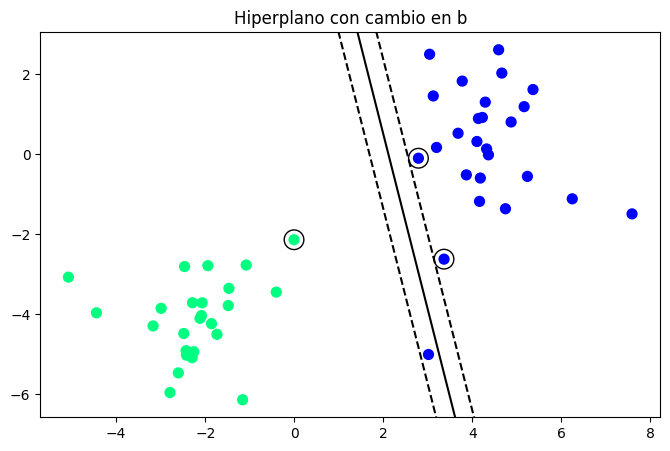

In [ ]:
# Cambiaremos el sesgo (b) para ver el efecto en el hiperplano
delta_b = 0.6  # Este es el cambio que aplicaremos a b
plot_hyperplane(w, b, delta_b)

1. Efecto del Sesgo: El cambio en el sesgo b ha desplazado el hiperplano sin cambiar su orientación. Este desplazamiento puede hacer que puntos previamente bien clasificados ahora se clasifiquen erróneamente, como se ve en el gráfico.
2. Esto subraya la importancia de tener visualizaciones dinámicas que reflejen los cambios en tiempo real cuando se ajustan los parámetros del modelo. Es decir, es necesario siempre revisar los resultados despues de hacer ajustes

### 2. Margen

¿Por qué se busca siempre esa maximiazacion del margen?
  * Generalización: Un margen más grande generalmente indica un modelo con mejor capacidad de generalización. En otras palabras, el modelo es menos propenso a sobreajustarse a los datos de entrenamiento y puede clasificar mejor los datos nuevos y no vistos.

  * Robustez: Al maximizar el margen, el modelo SVM es más robusto ante pequeñas perturbaciones o ruido en los datos. Los puntos de datos que son clasificados con una amplia brecha entre las clases son menos susceptibles a ser mal clasificados si hay cambios menores en sus características.

  * Teoría de Aprendizaje Estadístico: Desde una perspectiva teórica, en particular la teoría de Vapnik-Chervonenkis (VC), un margen más grande se asocia con una menor complejidad del modelo. Esto puede reducir el riesgo de sobreajuste y mejorar la capacidad predictiva del modelo.

  * Resistencia a Datos Atípicos: Un modelo con un margen amplio es menos sensible a los datos atípicos. Si los puntos de datos atípicos no son vectores de soporte, tienen un impacto limitado en la definición del hiperplano de decisión.

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.2, random_state=45, center_box=(-5, 5))